In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\dataset\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x= df.iloc[:,:-1]
# or x= df.drop(column=['quality'])
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
y=df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [6]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [7]:
from sklearn.ensemble import BaggingClassifier

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [9]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 100)

In [10]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [11]:
bag_dt.predict(x_test)

array([7, 6, 7, 6, 5, 5, 6, 6, 6, 5, 7, 7, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 8, 6, 5, 4, 5, 5, 6,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 4, 5, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5,
       6, 5, 6, 6, 7, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 5, 7, 7, 5,
       4, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 7, 7, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 5,
       5, 5, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 7, 6, 7, 5, 5, 6, 5, 7, 6, 7, 6, 6, 6, 6, 6, 5, 8, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5,

In [12]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [13]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [14]:
bag_dt.estimator_params

()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6), n_estimators=100)

In [17]:
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [18]:
bag_knn.predict(x_test)

array([6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 6, 4, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 7, 7, 7, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 7, 5, 5, 6, 6, 8, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 7, 5, 6, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 7, 6,
       6, 6, 6, 8, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 7, 7, 5, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7, 6, 6, 5, 5, 5,
       6, 5, 6, 7, 6, 5, 6, 5, 6, 5, 7, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6,

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=5)       # it is 5 no. of tree are crieated

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [22]:
rf.score(x_test,y_test)      # # the chenge the n_estimators then chenge the accuracy

0.6265664160401002

In [23]:
bag_dt.score(x_test,y_test)              # # the chenge the n_estimators then chenge the accuracy

0.6666666666666666

In [24]:
bag_knn.score(x_test,y_test).round(2)    # the chenge the n_estimators then chenge the accuracy

0.49

In [25]:
rf.estimators_   # the ceieat a 5 tree

[DecisionTreeClassifier(max_features='sqrt', random_state=1767209902),
 DecisionTreeClassifier(max_features='sqrt', random_state=223524414),
 DecisionTreeClassifier(max_features='sqrt', random_state=166319803),
 DecisionTreeClassifier(max_features='sqrt', random_state=928212103),
 DecisionTreeClassifier(max_features='sqrt', random_state=1338660047)]

In [26]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1767209902)

[Text(0.5830256364073007, 0.9705882352941176, 'X[10] <= 10.25\ngini = 0.642\nsamples = 750\nvalue = [8, 33, 512, 478, 143, 23]'),
 Text(0.38516150336215177, 0.9117647058823529, 'X[6] <= 70.5\ngini = 0.508\nsamples = 399\nvalue = [7, 26, 411, 172, 19, 2]'),
 Text(0.25231147934678194, 0.8529411764705882, 'X[7] <= 0.998\ngini = 0.579\nsamples = 283\nvalue = [7, 23, 248, 150, 19, 2]'),
 Text(0.10308597502401537, 0.7941176470588235, 'X[1] <= 0.365\ngini = 0.542\nsamples = 199\nvalue = [2, 17, 194, 87, 14, 2]'),
 Text(0.01921229586935639, 0.7352941176470589, 'X[5] <= 7.0\ngini = 0.565\nsamples = 22\nvalue = [0, 2, 5, 22, 4, 2]'),
 Text(0.007684918347742555, 0.6764705882352942, 'X[3] <= 1.75\ngini = 0.694\nsamples = 4\nvalue = [0, 0, 1, 1, 3, 2]'),
 Text(0.0038424591738712775, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 2]'),
 Text(0.011527377521613832, 0.6176470588235294, 'X[2] <= 0.49\ngini = 0.56\nsamples = 3\nvalue = [0, 0, 1, 1, 3, 0]'),
 Text(0.0076849183477425

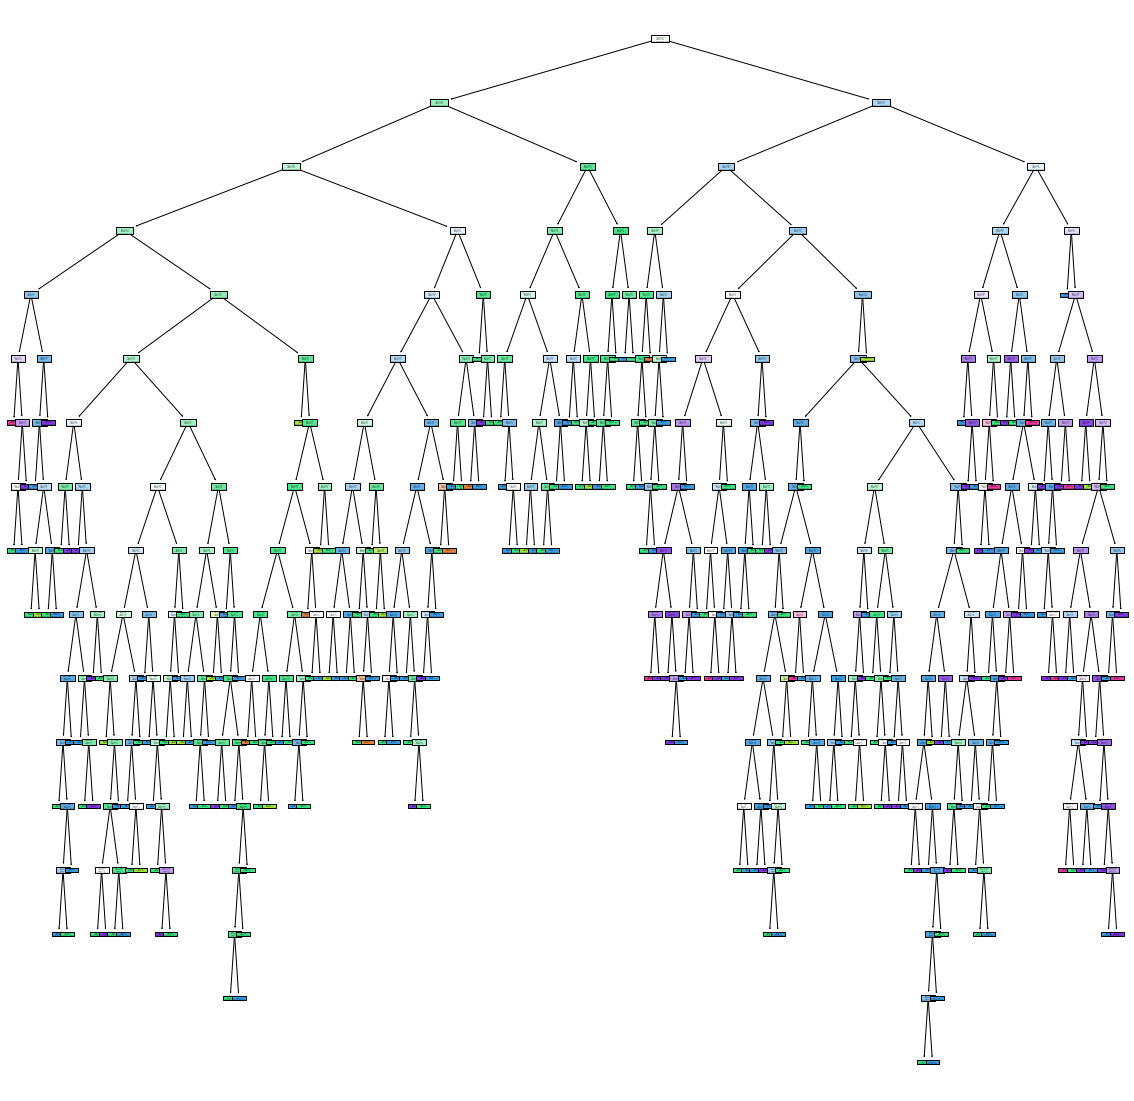

In [27]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(0.5693776089981447, 0.975, 'X[9] <= 0.675\ngini = 0.657\nsamples = 758\nvalue = [14, 44, 518, 441, 163, 17]'),
 Text(0.2942225185528757, 0.925, 'X[10] <= 10.35\ngini = 0.594\nsamples = 484\nvalue = [12, 39, 401, 261, 40, 3]'),
 Text(0.16001855287569575, 0.875, 'X[1] <= 0.907\ngini = 0.432\nsamples = 303\nvalue = [9, 21, 339, 95, 4, 0]'),
 Text(0.08998144712430427, 0.825, 'X[5] <= 6.5\ngini = 0.409\nsamples = 288\nvalue = [6, 15, 329, 92, 3, 0]'),
 Text(0.03896103896103896, 0.775, 'X[1] <= 0.615\ngini = 0.577\nsamples = 46\nvalue = [2, 3, 28, 24, 0, 0]'),
 Text(0.025974025974025976, 0.725, 'X[1] <= 0.525\ngini = 0.528\nsamples = 30\nvalue = [1, 1, 14, 22, 0, 0]'),
 Text(0.01855287569573284, 0.675, 'X[9] <= 0.625\ngini = 0.534\nsamples = 22\nvalue = [0, 1, 13, 11, 0, 0]'),
 Text(0.014842300556586271, 0.625, 'X[7] <= 0.996\ngini = 0.54\nsamples = 19\nvalue = [0, 1, 9, 11, 0, 0]'),
 Text(0.011131725417439703, 0.575, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.0185

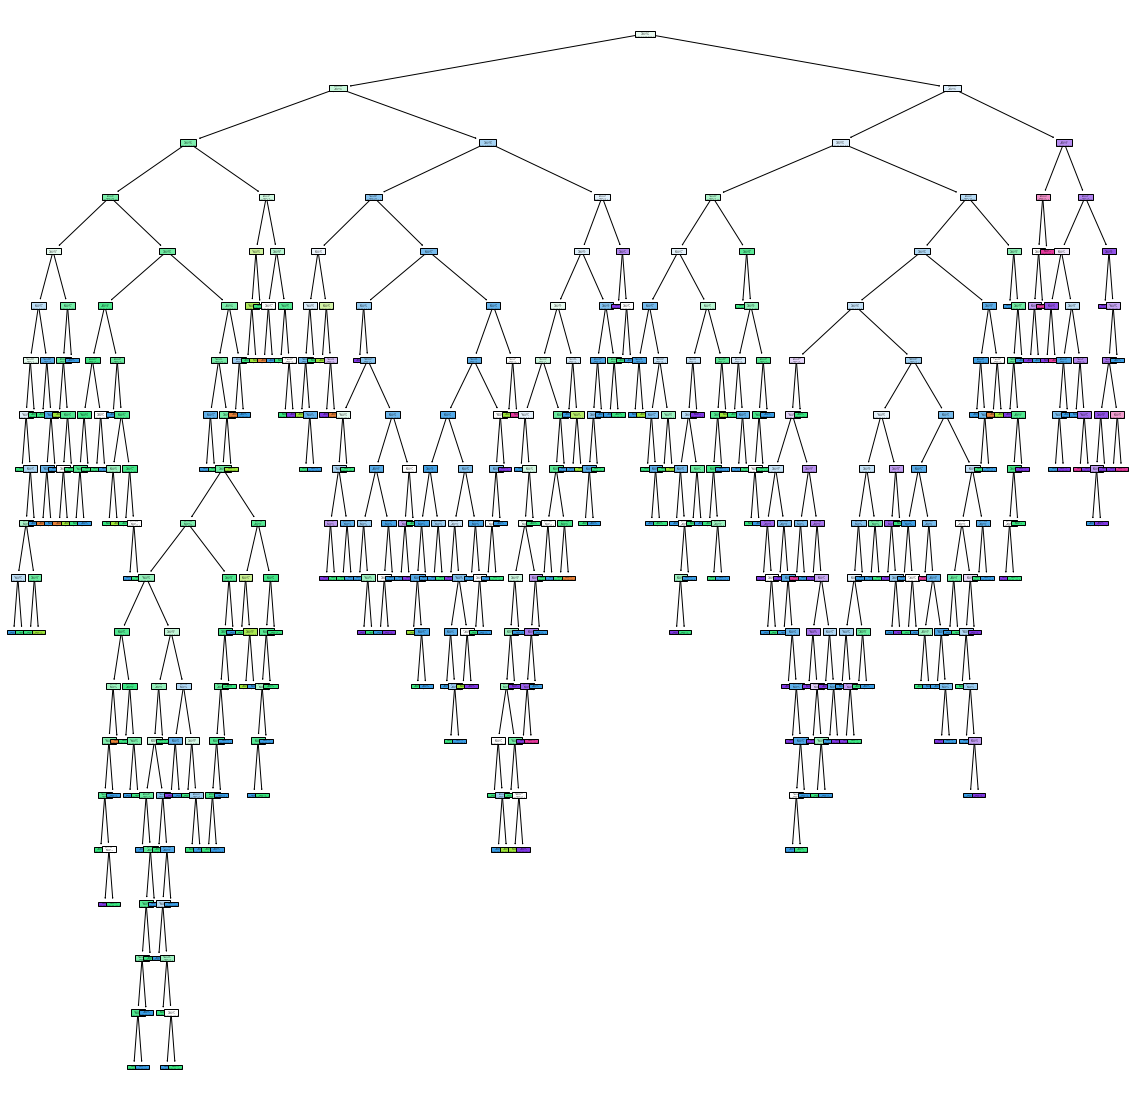

In [28]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

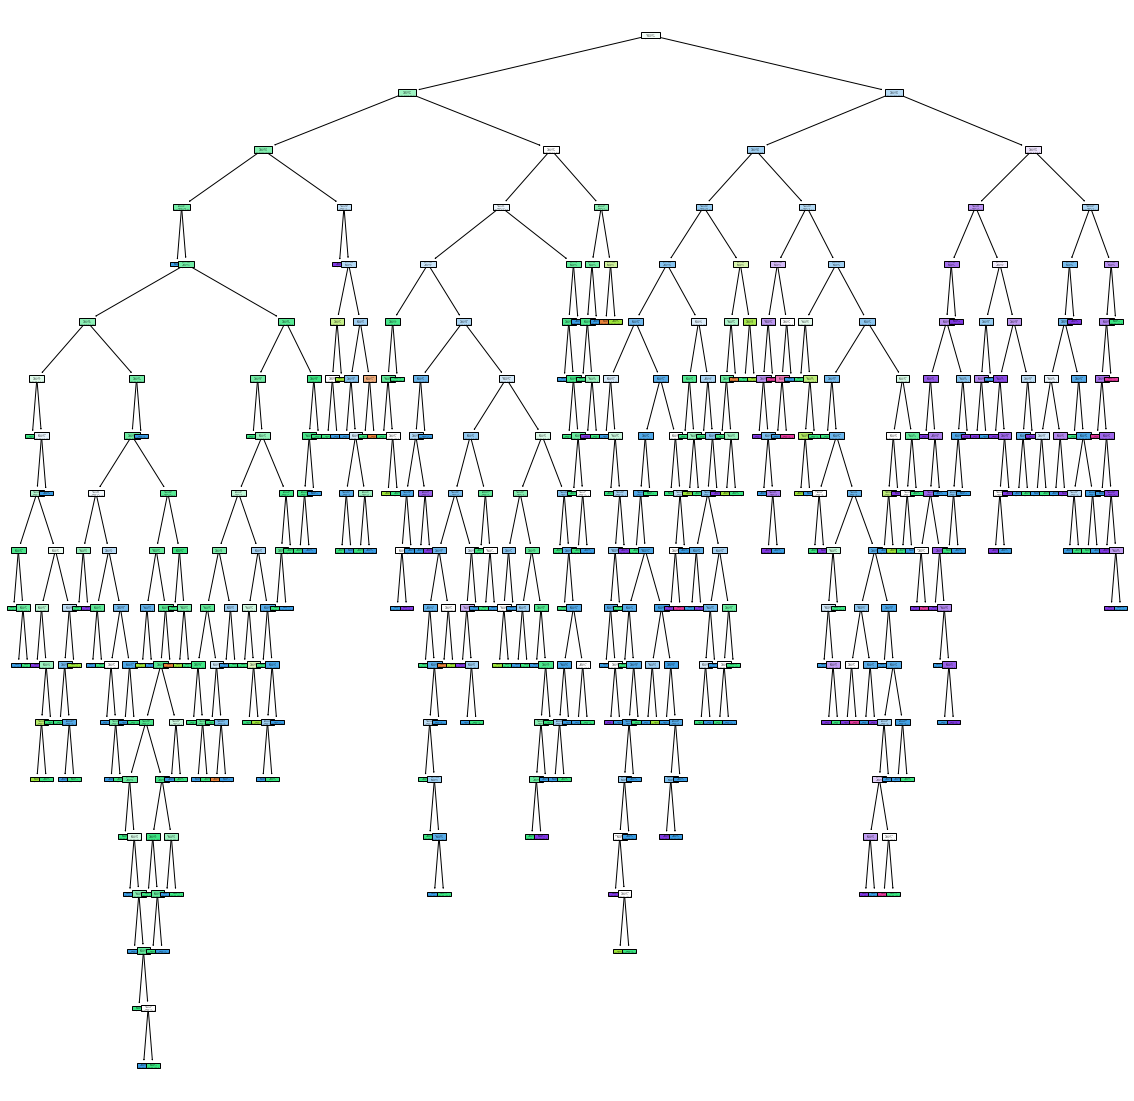

In [29]:
plt.figure(figsize = (20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i], filled=True)

In [30]:
grid_pram ={
    "n_estimators" : [5, 10, 50, 100, 120, 150],
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(10),
     "min_samples_leaf" : range(10)
}

In [31]:
rf = RandomForestClassifier(n_estimators=5) 

In [32]:
grid_serach_rf=GridSearchCV(param_grid=grid_pram, cv=10, n_jobs=6, verbose=1 , estimator = rf)   # GridSearchCV = it's finding the best parameter 

In [33]:
grid_serach_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    tr

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [34]:
grid_serach_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [35]:
 rf_new = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, n_estimators=150)

In [36]:
rf_new

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=150)

In [37]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=150)

In [44]:
rf_new.score(x_test,y_test).round(3)

0.639

[Text(0.47794495884773663, 0.95, 'X[9] <= 0.615\nentropy = 1.699\nsamples = 782\nvalue = [7, 45, 527, 465, 142, 11]'),
 Text(0.22202932098765432, 0.85, 'X[4] <= 0.073\nentropy = 1.447\nsamples = 363\nvalue = [5, 35, 320, 185, 16, 0]'),
 Text(0.09529320987654322, 0.75, 'X[1] <= 0.415\nentropy = 1.726\nsamples = 113\nvalue = [2, 16, 79, 66, 14, 0]'),
 Text(0.024691358024691357, 0.65, 'X[2] <= 0.245\nentropy = 1.347\nsamples = 27\nvalue = [0, 2, 3, 28, 9, 0]'),
 Text(0.00823045267489712, 0.55, 'X[5] <= 10.0\nentropy = 1.557\nsamples = 5\nvalue = [0, 2, 2, 3, 0, 0]'),
 Text(0.00411522633744856, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.012345679012345678, 0.45, 'X[3] <= 2.05\nentropy = 0.971\nsamples = 3\nvalue = [0, 2, 0, 3, 0, 0]'),
 Text(0.00823045267489712, 0.35, 'entropy = 0.0\nsamples = 1\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.01646090534979424, 0.35, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(0.0411522633744856, 0.55, 'X[6] <= 15.

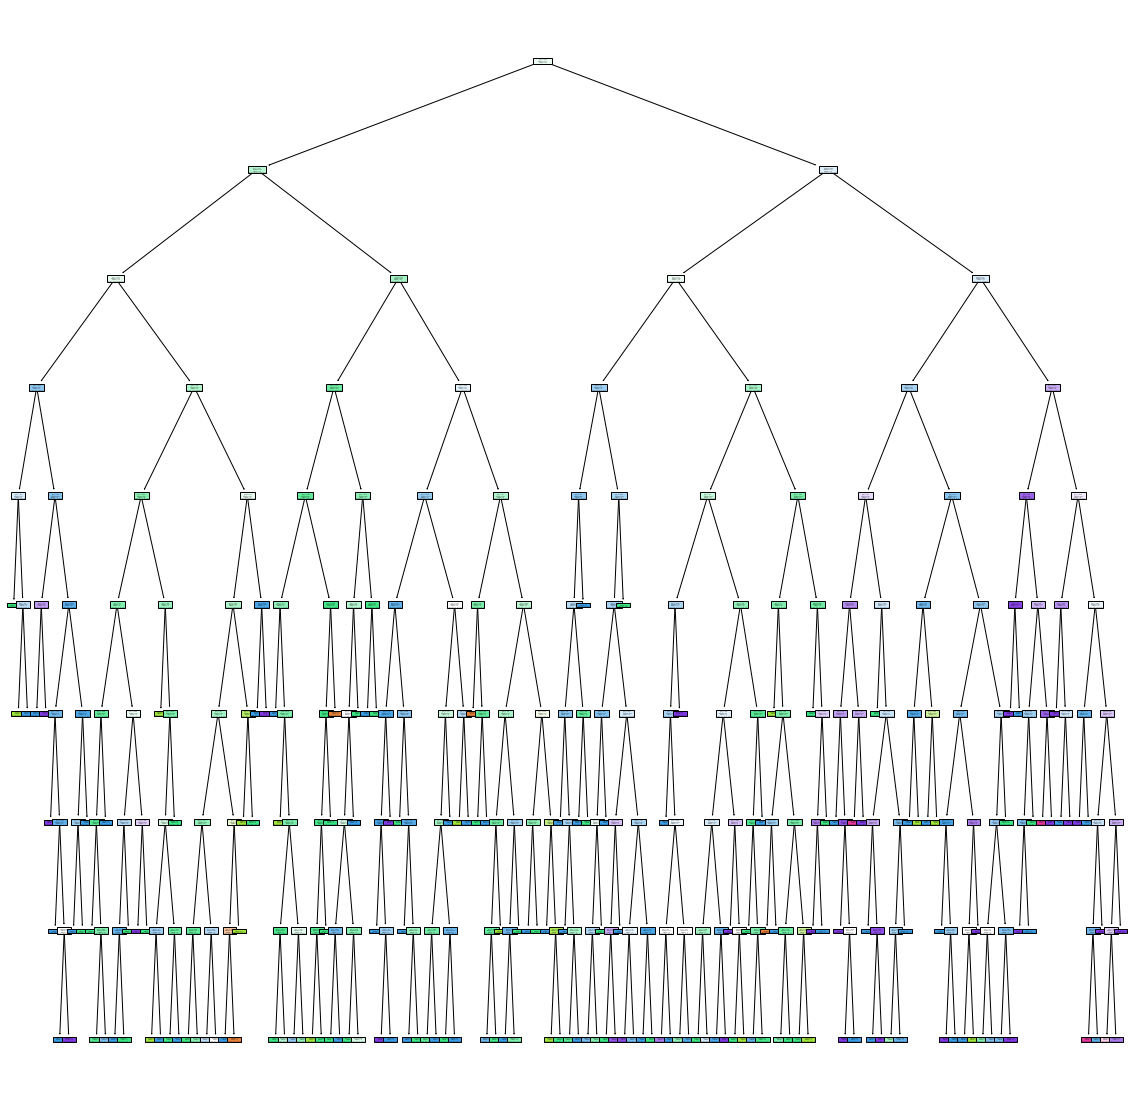

In [42]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf_new.estimators_[0],filled=True)